# Lesson 42: The Jupyter notebook

(c) 2016 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This lesson was generated from a Jupyter notebook.  You can download the notebook [here](l42_jupyter.ipynb).*

In [22]:
import numpy as np
import scipy.integrate
import pandas as pd

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

In this tutorial, you will learn the basics on how to use Jupyter notebooks.  It will be useful for you to go over [Tutorial 0c from my data analysis class](http://bebi103.caltech.edu/2015/tutorials/t0c_intro_to_latex.html) to learn how to use $\LaTeX$ in your Jupyter notebooks.  
You should, of course, read [the official Jupyter documentation](http://jupyter-notebook.readthedocs.org/) as well.

There are many sections to this lesson, so I provide a table of contents.

## Contents
* [What is Jupyter](#What-is-Jupyter?)
* [Launching a Jupyter notebook](#Launching-a-Jupyter-notebook)
* [Cells](#Cells)
* [Code cells](#Code-cells)
    - [Display of graphics](#Display-of-graphics)
    - [Interactive plotting with Bokeh](#Interactive-plotting-with-Bokeh)
    - [Proper formatting of cells](#Proper-formatting-of-cells)
    - [Best practices for code cells](#Best-practices-for-code-cells)
* [Markdown cells](#Markdown-cells)
* [Styling your notebook](#Styling-your-notebook)

## What is Jupyter?

[Jupyter](http://jupyter.org) is a way to combine text (with math!) and code (which runs and can display graphic output!) in an easy-to-read document that renders in a web browser.  The notebook itself is stored as a text file in [JSON](http://json.org) format.  This text file is what you will email the course staff when submitting your homework.

It is language agnostic as its name suggests.  The name "Jupyter" is a combination of [Julia](http://julialang.org/) (a new language for scientific computing), [Python](http://python.org/) (which you know and love, or at least will when the course is over), and [R](https://www.r-project.org) (the dominant tool for statistical computation).  However, you currently can run over 40 different languages in a Jupyter notebook, not just Julia, Python, and R.

## Launching a Jupyter notebook

To launch a Jupyter notebook, you can do the following.
* **Mac**: Use the Anaconda launcher and select Jupyter notebook.
* **Windows**: Under "Search programs and files" from the Start menu, type `jupyter notebook` and select "Jupyter notebook."

A Jupyter notebook will then launch in your default web browser.

You can also launch Jupyter from the command line.  To do this, simply enter

    jupyter notebook

on the command line and hit enter.  This also allows for greater flexibility, as you can launch Jupyter with command line flags.  For example, I launch Jupyter using

    jupyter notebook --browser=safari

This fires up Jupyter with Safari as the browser.  If you launch Jupyter from the command line, your shell will be occupied with Jupyter and will occasionally print information to the screen.  After you are finished with your Jupyter session (and have saved everything), you can kill Jupyter by hitting "`ctrl + C`" in the terminal/PowerShell window.

When you launch  Jupyter, you will be presented with a menu of files in your current working directory to choose to edit.  You can also navigate around the files on your computer to find a file you wish to edit by clicking the "Upload" button in the upper right corner.  You can also click "New" in the upper right corner to get a new Jupyter notebook.  After selecting the file you wish to edit, it will appear in a new window in your browser, beautifully formatted and ready to edit.

## Cells

A Jupyter notebook consists of **cells**.  The two main types of cells you will use are **code cells** and **markdown cells**, and we will go into their properties in depth momentarily.  First, an overview.

A code cell contains actual code that you want to run.  You can specify a cell as a code cell using the pulldown menu in the toolbar in your Jupyter notebook.  Otherwise, you can can hit `esc` and then `y` (denoted "`esc, y`") while a cell is selected to specify that it is a code cell.  Note that you will have to hit enter after doing this to start editing it.

If you want to execute the code in a code cell, hit "`shift + enter`."  Note that code cells are executed in the order you execute them.  That is to say, the ordering of the cells for which you hit "`shift + enter`" is the order in which the code is executed.  If you did not explicitly execute a cell early in the document, its results are now known to the Python interpreter.

Markdown cells contain text.  The text is written in **markdown**, a lightweight markup language.  You can read about its syntax [here](http://daringfireball.net/projects/markdown/syntax).  Note that you can also insert HTML into markdown cells, and this will be rendered properly.  As you are typing the contents of these cells, the results appear as text.  Hitting "`shift + enter`" renders the text in the formatting you specify.

You can specify a cell as being a markdown cell in the Jupyter toolbar, or by hitting "`esc, m`" in the cell.  Again, you have to hit enter after using the quick keys to bring the cell into edit mode.

In general, when you want to add a new cell, you can use the "Insert" pulldown menu from the Jupyter toolbar.  The shortcut to insert a cell below is "`esc, b`" and to insert a cell above is "`esc, a`."  Alternatively, you  can execute a cell and automatically add a new one below it by hitting "`alt + enter`."

## Code cells

Below is an example of a code cell printing `hello, world.`  Notice that the output of the print statement appears in the same cell, though separate from the code block.

In [2]:
# Say hello to the world.
print('hello, world.')

hello, world.


If you evaluate a Python expression that returns a value, that value is displayed as output of the code cell.  This only happens, however, for the last line of the code cell.

In [3]:
# Would show 9 if this were the last line, but it is not, so shows nothing
4 + 5

# I hope we see 11.
5 + 6

11

Note, however, if the last line does not return a value, such as if we assigned a variable, there is no visible output from the code cell.

In [4]:
# Variable assignment, so no visible output.
a = 5 + 6

In [5]:
# However, now if we ask for a, its value will be displayed
a

11

In the next sections, we will demonstrate some plotting in Jupyter, so we will load in the `DataFrame` of Darwin finch data as a demo.  We will use the 1987 data.

In [8]:
# Load in DataFrame
df = pd.read_csv('data/grant_1987.csv', comment='#')

# Change labels
df.columns = ['band', 'species', 'beak_length', 'beak_depth']

### Display of graphics

When displaying graphics, you should have them **inline**, meaning that they are displayed directly in the IPython notebook and not in a separate window.  You can specify that, as I did at the top of this document, using the `%matplotlib inline` magic function.  Below is an example of graphics displayed inline.

For papers, etc., I prefer presenting graphics as scalable vector graphics (SVG). For Jupyter notebooks, I generally prefer Bokeh (see below). For use of Matplotlib in Jupyter notebooks, high resolution PNGs suffice. To specify this, use

    %config InlineBackend.figure_formats = {'png', 'retina'}

at the top of your Jupyter notebook.

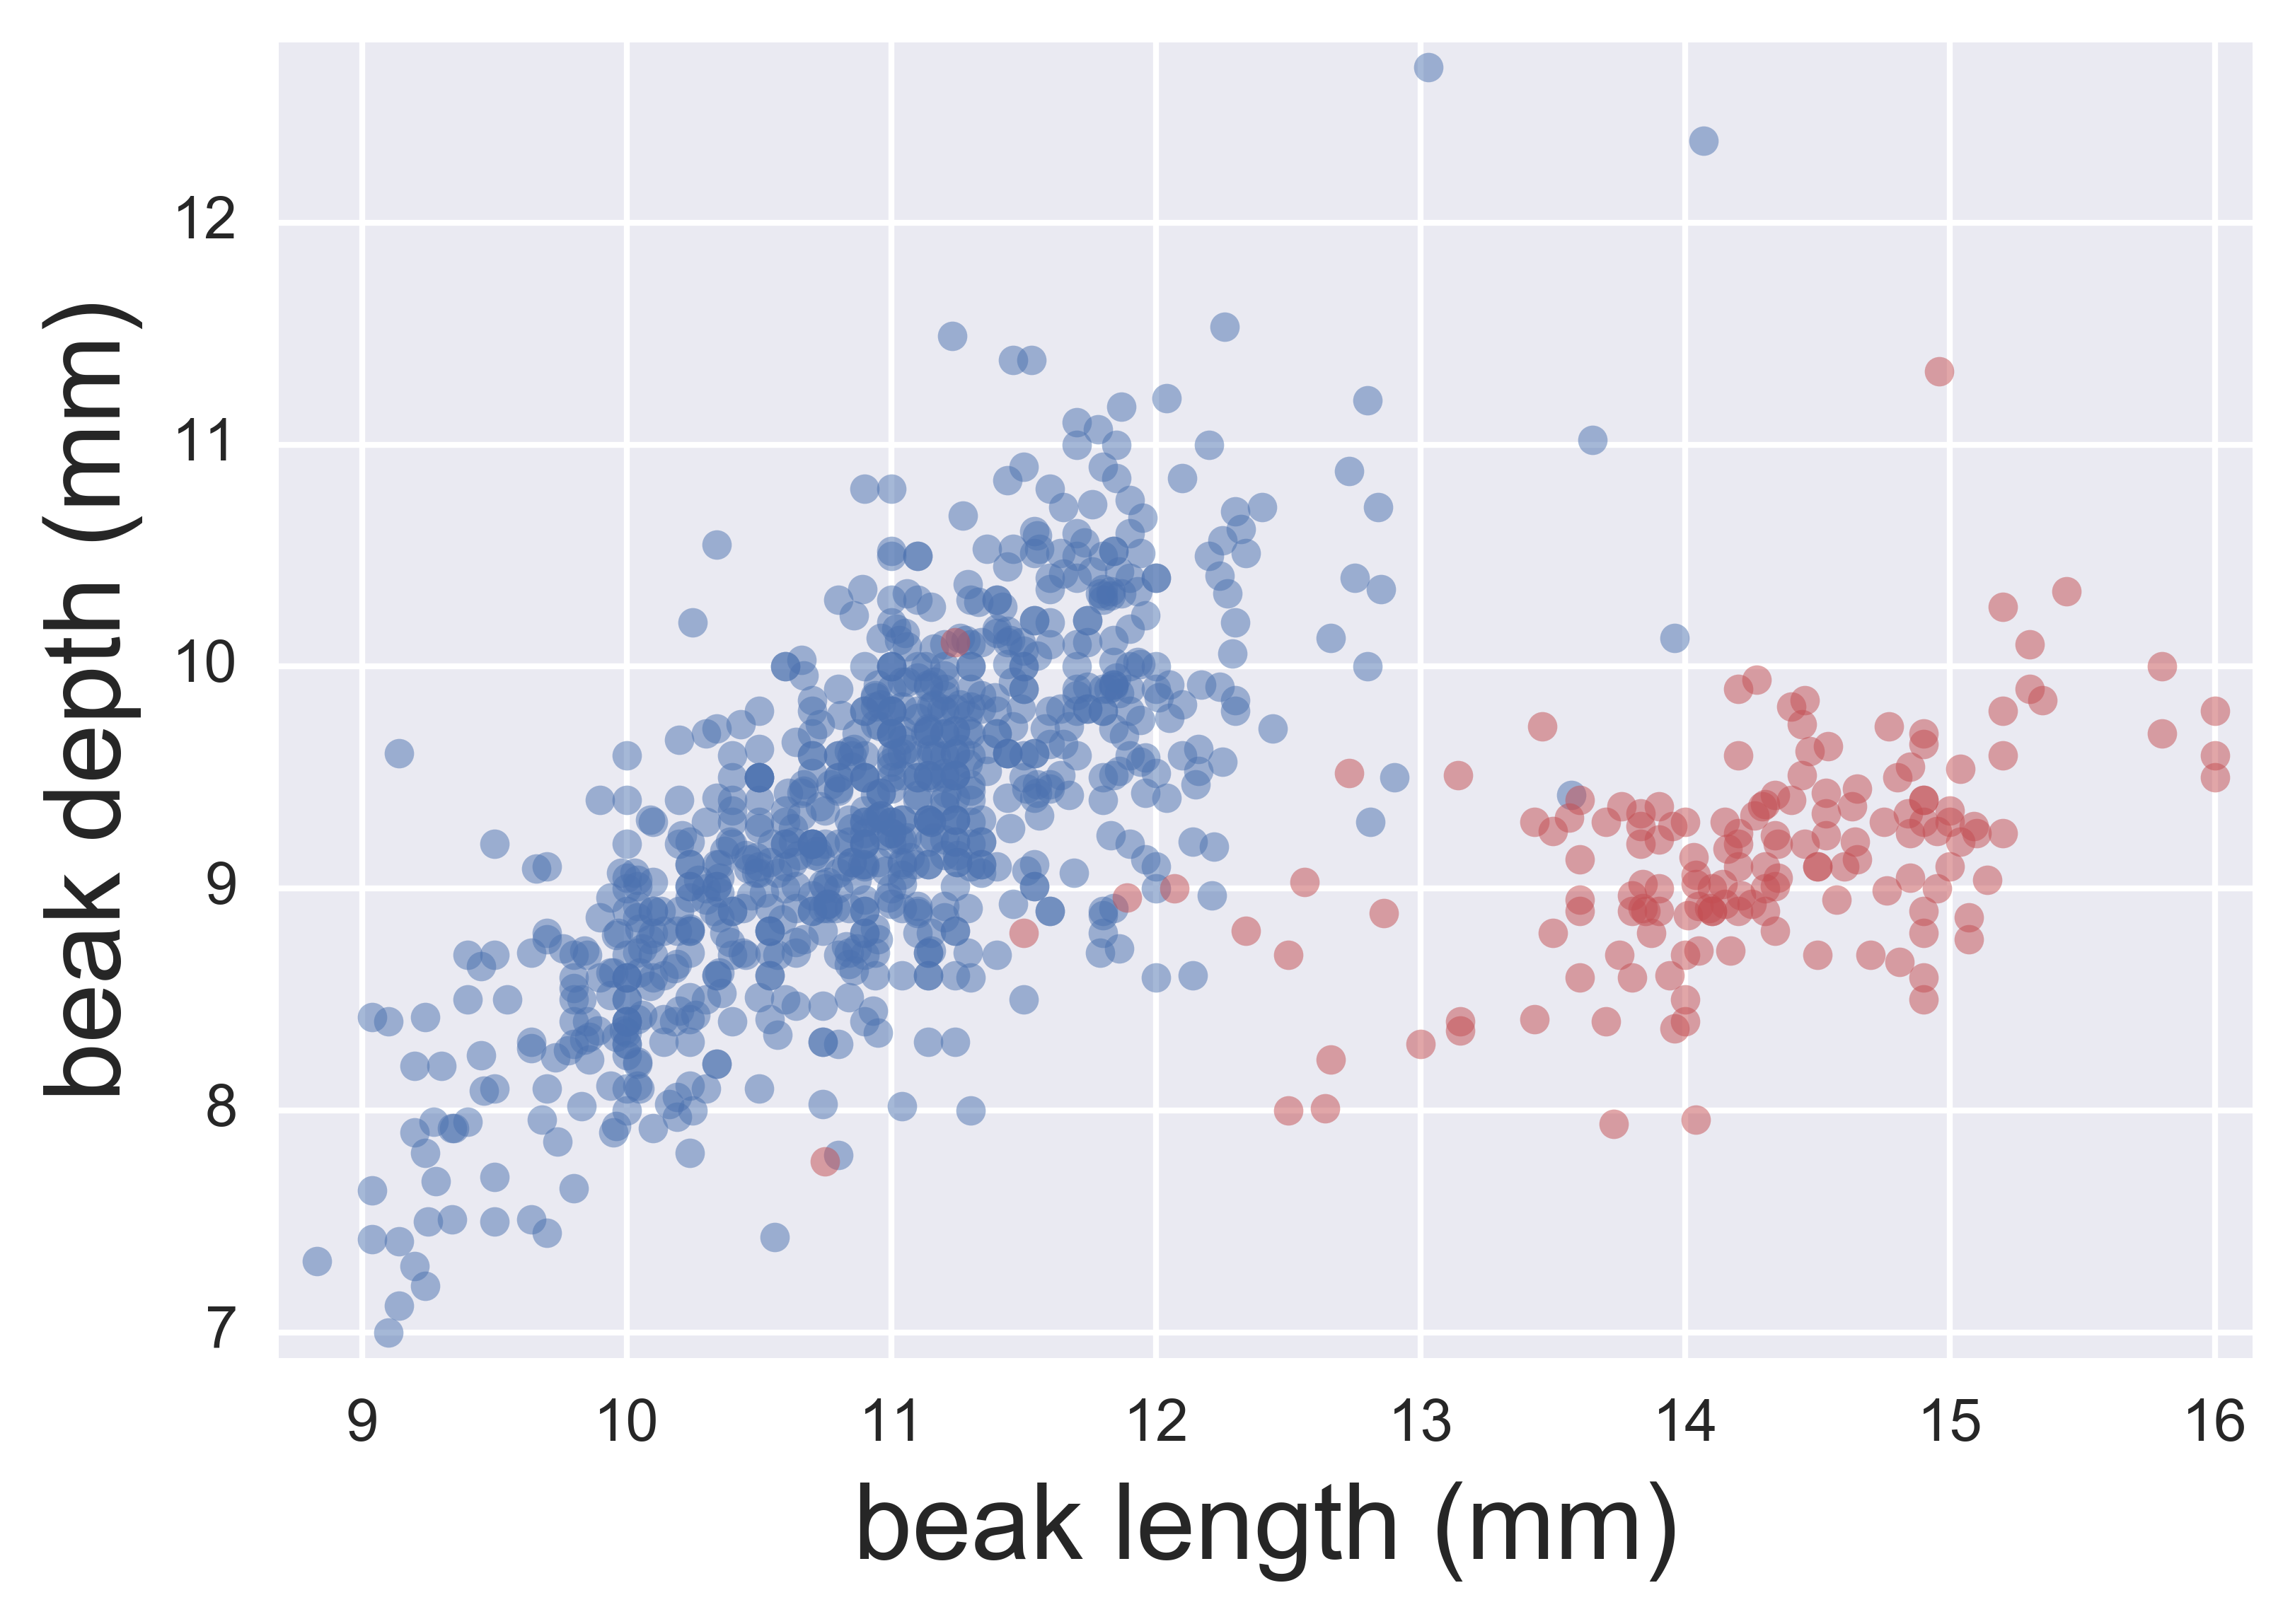

In [10]:
# Slice data from DataFrame
fortis_depth = df[df['species']=='fortis']['beak_depth']
scandens_depth = df[df['species']=='scandens']['beak_depth']
fortis_length = df[df['species']=='fortis']['beak_length']
scandens_length = df[df['species']=='scandens']['beak_length']

# Make plot
plt.plot(fortis_length, fortis_depth, marker='.', linestyle='', markersize=10,
         alpha=0.5)
plt.plot(scandens_length, scandens_depth, marker='.', linestyle='', markersize=10,
         alpha=0.5, color=sns.color_palette()[2])
plt.margins(0.02)
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')

The plot is included inline with the styling we specified using Seaborn at the beginning of the document. 

### Interactive plotting with Bokeh

It is useful to interact with our data.  [Bokeh](http://bokeh.pydata.org/en/latest/) (pronounced "BOH-kay") facilitates this.  As the least, we would like to be able make a static plot and then be able to pan and zoom within the Jupyter notebook.  This is very easily accomplished for many plots with a simple one-liner.  Simply put

    bokeh.plotting.show(bokeh.mpl.to_bokeh())

at the end of your cell with plotting instructions, and your Matplotlib-generated plot will be rendered with Bokeh, which allows pan and zoom.  Note that Bokeh does not yet have $\LaTeX$ integration, do you cannot have the fancy axis labels we had in the previous example.  (Also, if you want to have some fun, use

    bokeh.plotting.show(bokeh.mpl.to_bokeh(xkcd=True))
    
We can remake the plot using Bokeh.  This is not a great use case for Bokeh, since there are no data to zoom in on, but is just provided to show how to use it.

In [19]:
# Make plot
plt.plot(fortis_length, fortis_depth, marker='o', markersize=6, linestyle='', 
         alpha=0.5)
plt.plot(scandens_length, scandens_depth, marker='o', linestyle='', markersize=6,
         alpha=0.5, color=sns.color_palette()[2])
plt.margins(0.02)
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

While this is convenient, I actually prefer Bokeh's native syntax for generating graphics better.  It is based on [grammar of graphics](http://www.amazon.com/The-Grammar-Graphics-Statistics-Computing/dp/0387245448), which is more conceptually clean way to think about graphical display of data.

In [17]:
# Plot with Bokeh, first make figure
p = bokeh.plotting.figure(height=400, width=500, x_axis_label='beak length (mm)',
                          y_axis_label='beak depth (mm)')

# Put in glyphs
p.circle(fortis_length, fortis_depth, color='dodgerblue', alpha=0.5)
p.circle(scandens_length, scandens_depth, color='tomato', alpha=0.5)

bokeh.plotting.show(p)

There is a lot more you can do with Bokeh.  You can explore more [here](http://bokeh.pydata.org/).  Bokeh is quite new and very actively being developed, so I think it holds great promise for the future.

### Proper formatting of cells

Generally, it is a good idea to keep cells simple.  You can define one function, or maybe two or three closely related functions, in a single cell, and that's about it.  When you define a function, you should make sure it is properly commented with descriptive doc strings.  Below is an example of how I might generate a plot of the Lorenz attractor (which I choose just because it is fun) with code cells and markdown cells with discussion of what I am doing.

We will use `scipy.integrate.odeint()` to numerically integrate the Lorenz attractor.  We therefore first define a function that returns the right hand side of the system of ODEs that define the Lorentz attractor.

In [20]:
def lorenz_attractor(r, t, p):
    """
    Compute the right hand side of system of ODEs for Lorenz attractor.
    
    Parameters
    ----------
    r : array_like, shape (3,)
        (x, y, z) position of trajectory.
    t : dummy_argument
        Dummy argument, necessary to pass function into 
        scipy.integrate.odeint
    p : array_like, shape (3,)
        Parameters (s, k, b) for the attractor.
        
    Returns
    -------
    output : ndarray, shape (3,)
        Time derivatives of Lorenz attractor.
        
    Notes
    -----
    .. Returns the right hand side of the system of ODEs describing
       the Lorenz attractor.
        x' = s * (y - x)
        y' = x * (k - z) - y
        z' = x * y - b * z
    """
    # Unpack variables and parameters
    x, y, z = r
    s, p, b = p
    
    return np.array([s * (y - x), 
                     x * (p - z) - y, 
                     x * y - b * z])

With this function in hand, we just have to pick our initial conditions and time points, run the numerical integration, and then plot the result.

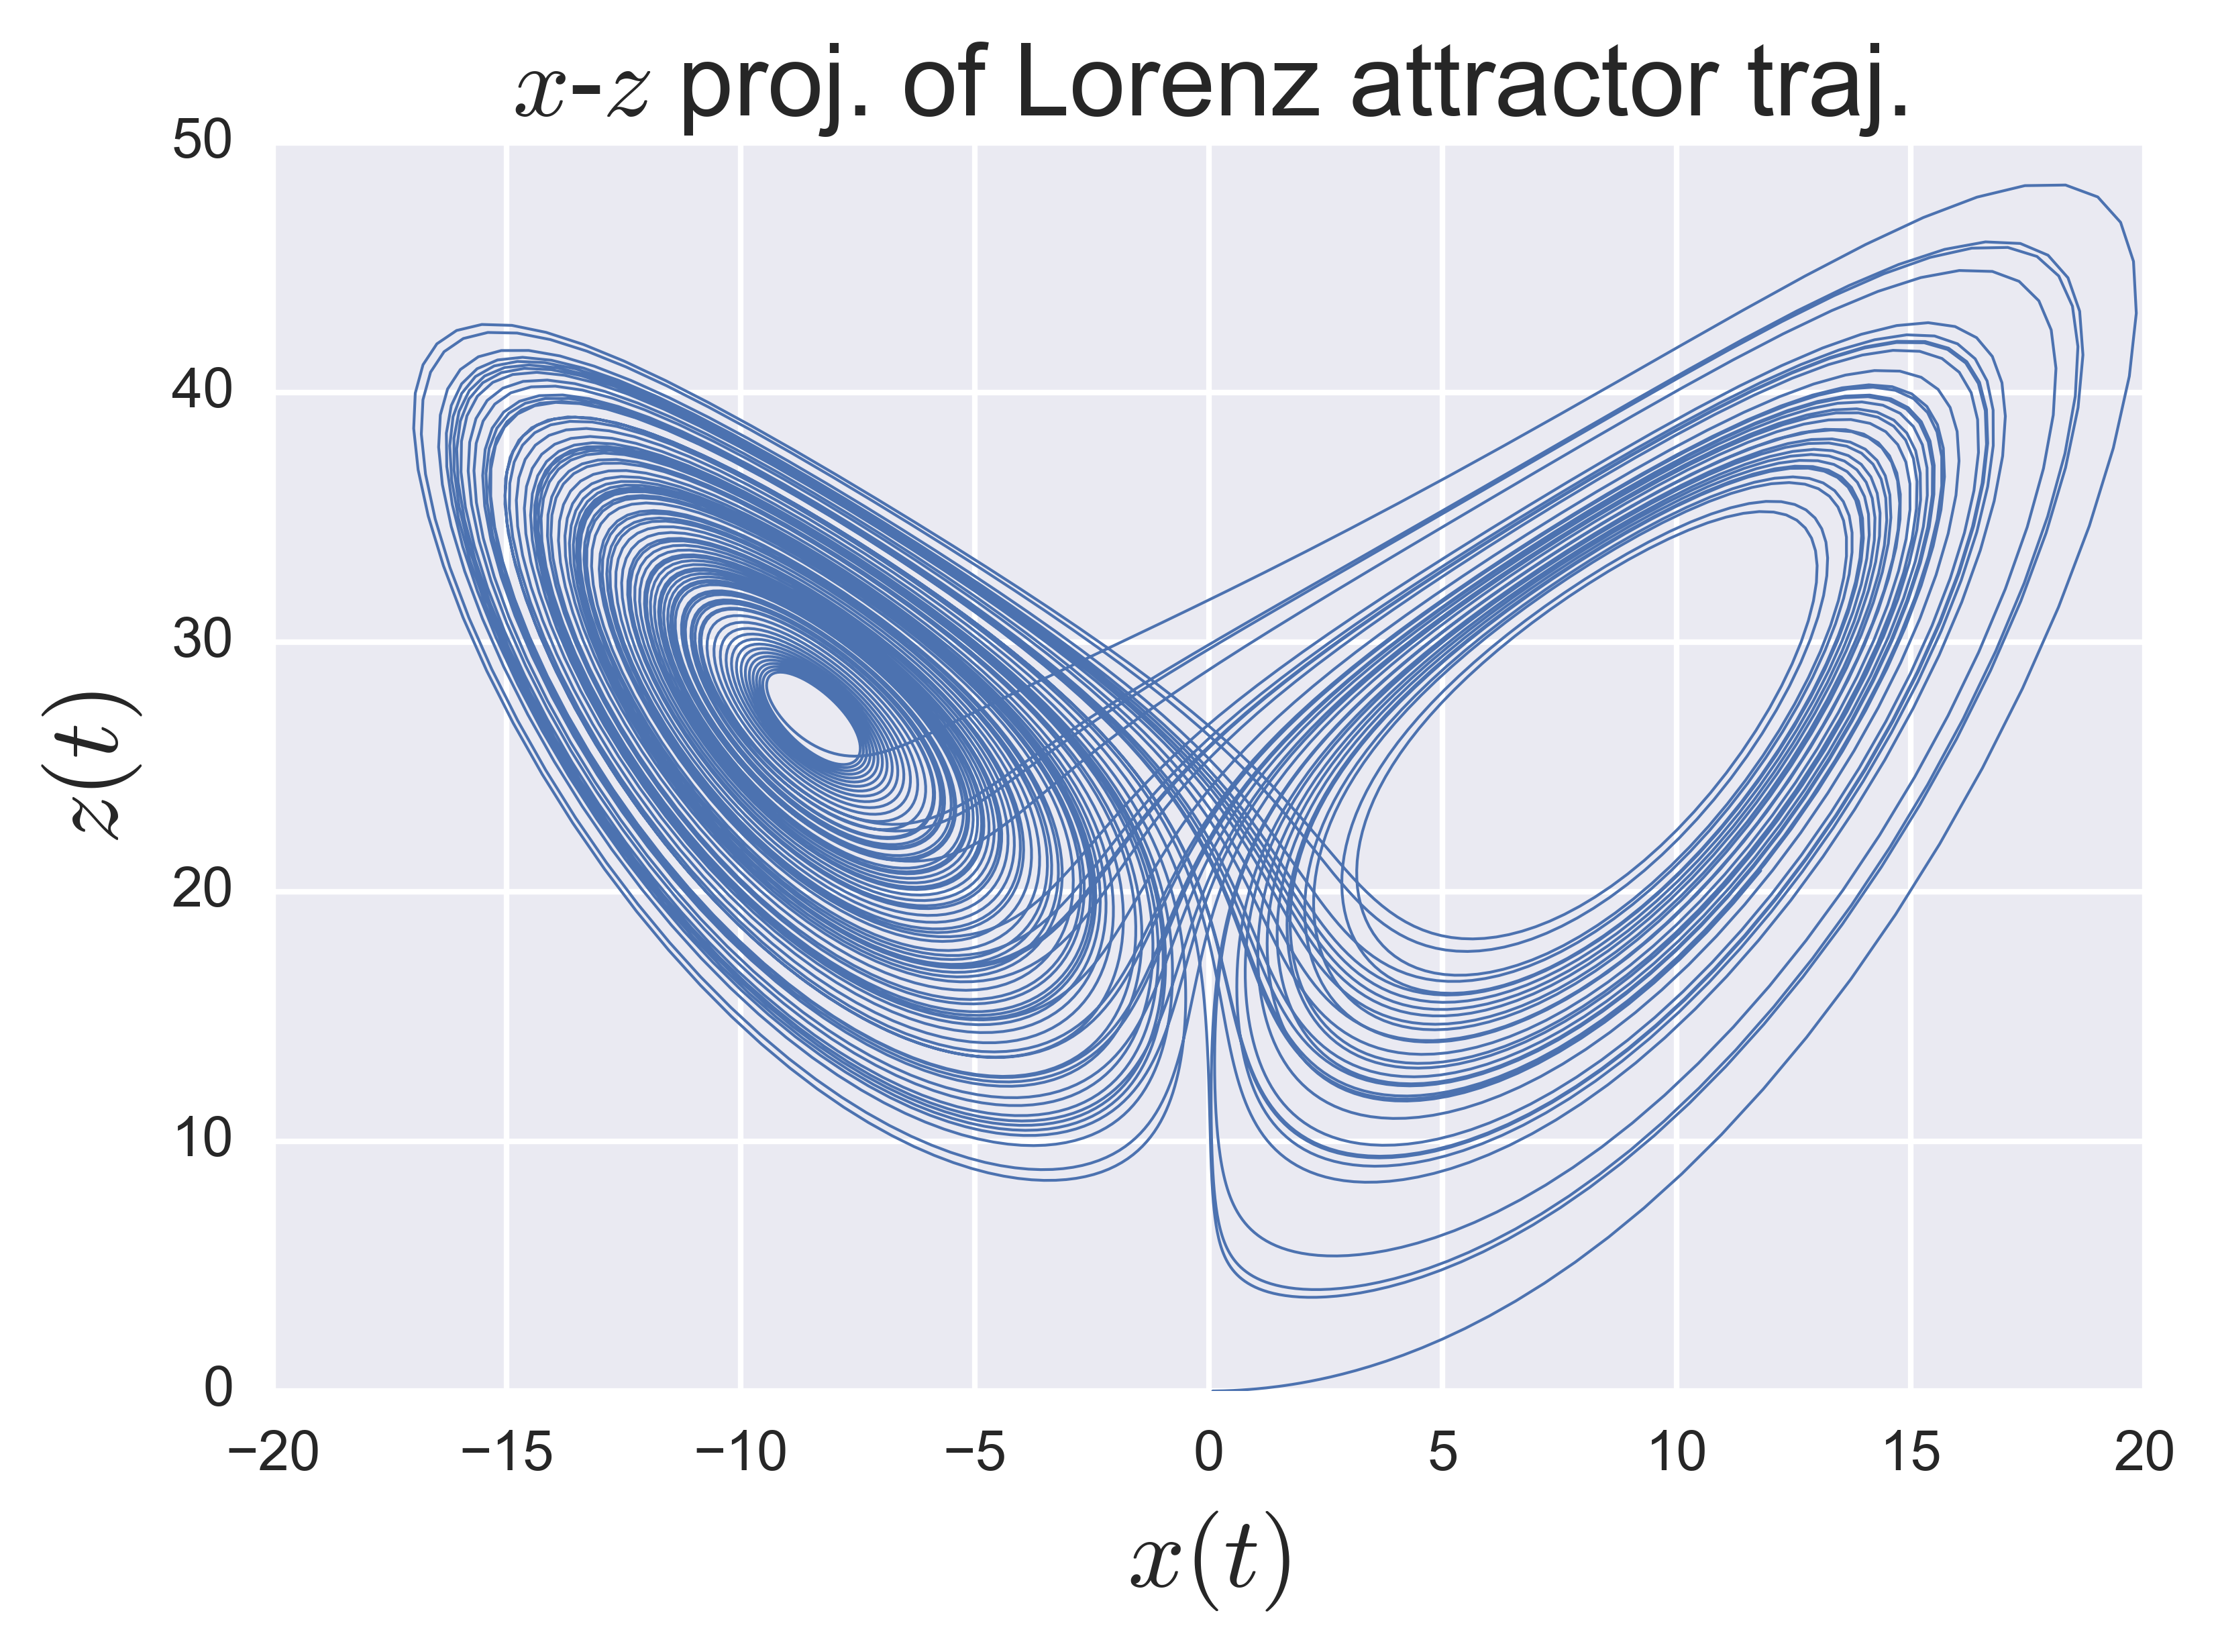

In [23]:
# Parameters to use
p = np.array([10.0, 28.0, 8.0 / 3.0])

# Initial condition
r0 = np.array([0.1, 0.0, 0.0])

# Time points to sample
t = np.linspace(0.0, 80.0, 10000)

# Use scipy.integrate.odeint to integrate Lorentz attractor
r = scipy.integrate.odeint(lorenz_attractor, r0, t, args=(p,))

# Unpack results into x, y, z.
x, y, z = r.transpose()

# Plot the result
plt.plot(x, z, '-', linewidth=0.5)
plt.xlabel(r'$x(t)$', fontsize=18)
plt.ylabel(r'$z(t)$', fontsize=18)
plt.title(r'$x$-$z$ proj. of Lorenz attractor traj.')

## Markdown cells

Markdown cells contain text.  The text is written in **markdown**, a lightweight markup language.  The list of syntactical constructions at [this link](http://daringfireball.net/projects/markdown/syntax) are pretty much all you need to know for standard markdown.  Note that you can also insert HTML into markdown cells, and this will be rendered properly.  As you are typing the contents of these cells, the results appear as text.  Hitting "`shift + enter`" renders the text in the formatting you specify.

You can specify a cell as being a markdown cell in the Jupyter tool bar, or by hitting "`esc, m`" in the cell.  Again, you have to hit enter after using the quick keys to bring the cell into edit mode.

In addition to HTML, some $\LaTeX$ expressions may be inserted into markdown cells.  $\LaTeX$ (pronounced "lay-tech") is a document markup language that uses the $\TeX$ typesetting software.  It is particularly well-suited for beautiful typesetting of mathematical expressions.  In Jupyter notebooks, the $\LaTeX$  mathematical input is rendered using software called MathJax.  This is run off of a remote server, so if you are not connected to the internet, your equations will not be rendered.  You will use $\LaTeX$ extensively in preparation of your assignments.  There are plenty of resources on the internet for getting started with $\LaTeX$, but you will only need a tiny subset of its functionality in your assignments, and [Tutorial 0c](t0c_intro_to_latex.html), plus cheat sheets you may find by Google (such as [this one](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf)) are useful.

## Styling your notebook
The default styles of Jupyter notebooks usually work just fine.  However, I am getting older, and my old eyes need bigger font sizes and a narrower page width.  I also do not like the clutter of the default numbering of the code cells.  I therefore made a CSS style that I like for my Jupyter notebooks, which is the style used to display all of our tutorials and homeworks on the course website.  You, too, can use this style.  To do so, do the following:

1. On the command line, execute <br />
        jupyter --config-dir 
2. Let's call the directory containing the Jupyter configuration `$JUPYTER_CONFIG_DIR` (this is actually the name of an environment variable Jupyter will look for).  Create a directory `$JUPYTER_CONFIG_DIR/custom/`.
3. Copy the file`~/git/bootcamp/misc/custom.css` to the directory you just created.
That's it!  


Jupyter notebooks will now be styled with my CSS file.  If you are a bit more proficient with using the command line and you want to be able to also use the standard Jupyter notebook formatting, you can create a new config directory, such as `$HOME/.jupyter_custom`, copy the CSS file there, and then change the `JUPYTER_CONFIG_DIR` environment variable to that directory.  You then select which styling you want to use by changing the `JUPYTER_CONFIG_DIR` enviroment variable.